# pandas exploration
In this assignment you will select a data set and do some munging and analysis of it using `pandas`, Jupyter Notebooks, and associated Python-centric data science tools.

Import the core data science libraries:

In [85]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Import the raw data
In this section, you will import the raw data into a `pandas` DataFrame.

In [86]:
df = pd.read_csv('JC-20162-citibike-tripdata.csv')

## Data inspection
In this section, you will show enough of your data for a viewer to get a general sense of how the data is structured and any unique features of it.  Complete each of the indicated tasks in a Code cell, making sure to include a Markdown cell above each Code cell that explains what is being shown by the code.  
- Show 5 rows, selected at random, from the data set.
- Show each of the column names and their data types.
- Show any unique features of your chosen data set.

Feel free to add as many additional cells as you need to help explain the raw data.

#### Show 5 random rows of the data set

In [87]:
df.sample(5)

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
7904,342,2016-02-29 07:51:07,2016-02-29 07:56:50,3203,Hamilton Park,40.727596,-74.044247,3186,Grove St PATH,40.719586,-74.043117,24468,Subscriber,1985.0,1
3889,399,2016-02-16 21:30:27,2016-02-16 21:37:07,3194,McGinley Square,40.725340,-74.067622,3213,Van Vorst Park,40.718489,-74.047727,24551,Subscriber,1988.0,1
4403,1130,2016-02-18 10:30:43,2016-02-18 10:49:33,3201,Dey St,40.737711,-74.066921,3198,Heights Elevator,40.748716,-74.040443,24462,Subscriber,1963.0,1
7083,427,2016-02-26 17:53:48,2016-02-26 18:00:56,3198,Heights Elevator,40.748716,-74.040443,3215,Central Ave,40.746730,-74.049251,24619,Subscriber,1987.0,1
8197,402,2016-02-29 19:27:54,2016-02-29 19:34:36,3195,Sip Ave,40.730743,-74.063784,3193,Lincoln Park,40.724605,-74.078406,24488,Subscriber,1972.0,1


#### Show each of the column names and their data types (It is weird that `Birth Year` is a float column)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8250 entries, 0 to 8249
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Trip Duration            8250 non-null   int64  
 1   Start Time               8250 non-null   object 
 2   Stop Time                8250 non-null   object 
 3   Start Station ID         8250 non-null   int64  
 4   Start Station Name       8250 non-null   object 
 5   Start Station Latitude   8250 non-null   float64
 6   Start Station Longitude  8250 non-null   float64
 7   End Station ID           8250 non-null   int64  
 8   End Station Name         8250 non-null   object 
 9   End Station Latitude     8250 non-null   float64
 10  End Station Longitude    8250 non-null   float64
 11  Bike ID                  8250 non-null   int64  
 12  User Type                8250 non-null   object 
 13  Birth Year               7920 non-null   float64
 14  Gender                  

#### Show the `Gender` column of the data set (which uses the numeric representation that 0='Unknown', 1='Male', and 2='Female')

In [89]:
df['Gender']

0       1
1       2
2       1
3       2
4       2
       ..
8245    1
8246    1
8247    1
8248    1
8249    1
Name: Gender, Length: 8250, dtype: int64

## Data munging
Place your **data munging** code and documentation within this section.  
- Keep each of your Code cells short and focused on a single task.  
- Include a Markdown cell above each code cell that describes what task the code within the code cell is performing.
- Make as many code cells as you need to complete the munging - a few have been created for you to start with.
- Display 5 sample rows of the modified data after each transformation so a viewer can see how the data has changed.

**Note**: If you believe that your data set does not require any munging, please explain in detail.  Create Markdown cells that explain your thinking and create Code cells that show any specific structures of the data you refer to in your explanation.

#### Find empty values (which are in `Birth Year`)

In [90]:
df[ df.isnull().any(axis=1) ]

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
125,3665,2016-02-01 09:56:46,2016-02-01 10:57:52,3212,Christ Hospital,40.734786,-74.050444,3185,City Hall,40.717732,-74.043845,24531,Customer,NaN,0
148,1081,2016-02-01 11:43:51,2016-02-01 12:01:53,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,-74.055701,24624,Customer,NaN,0
154,1100,2016-02-01 12:04:35,2016-02-01 12:22:56,3192,Liberty Light Rail,40.711242,-74.055701,3192,Liberty Light Rail,40.711242,-74.055701,24624,Customer,NaN,0
163,1579,2016-02-01 12:26:09,2016-02-01 12:52:29,3192,Liberty Light Rail,40.711242,-74.055701,3183,Exchange Place,40.716247,-74.033459,24624,Customer,NaN,0
168,1619,2016-02-01 12:53:44,2016-02-01 13:20:44,3186,Grove St PATH,40.719586,-74.043117,3203,Hamilton Park,40.727596,-74.044247,24510,Customer,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8027,2252,2016-02-29 13:43:54,2016-02-29 14:21:26,3192,Liberty Light Rail,40.711242,-74.055701,3192,Liberty Light Rail,40.711242,-74.055701,24643,Customer,NaN,0
8044,3255,2016-02-29 14:35:03,2016-02-29 15:29:19,3205,JC Medical Center,40.716540,-74.049638,3205,JC Medical Center,40.716540,-74.049638,24675,Customer,NaN,0
8045,74582,2016-02-29 14:35:40,2016-03-01 11:18:42,3205,JC Medical Center,40.716540,-74.049638,3205,JC Medical Center,40.716540,-74.049638,24677,Customer,NaN,0
8094,3433,2016-02-29 16:53:11,2016-02-29 17:50:24,3192,Liberty Light Rail,40.711242,-74.055701,3192,Liberty Light Rail,40.711242,-74.055701,24451,Customer,NaN,0


#### Change empty values to be 0 (Since each record with an empty birth year has an unknown gender, it is possible that there were unregistered users of citibike)

In [91]:
df = df.fillna(0)

In [92]:
df[df['Birth Year'] == 0].sample(5)

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
7864,975,2016-02-29 06:33:38,2016-02-29 06:49:53,3203,Hamilton Park,40.727596,-74.044247,3211,Newark Ave,40.721525,-74.046305,24573,Customer,0.0,0
7782,598,2016-02-28 18:37:42,2016-02-28 18:47:41,3186,Grove St PATH,40.719586,-74.043117,3211,Newark Ave,40.721525,-74.046305,24602,Customer,0.0,0
5425,1148,2016-02-21 13:23:33,2016-02-21 13:42:41,3184,Paulus Hook,40.714145,-74.033552,3205,JC Medical Center,40.716540,-74.049638,24394,Customer,0.0,0
7633,1285,2016-02-28 14:39:05,2016-02-28 15:00:31,3192,Liberty Light Rail,40.711242,-74.055701,3202,Newport PATH,40.727224,-74.033759,24392,Customer,0.0,0
3426,127,2016-02-12 19:09:36,2016-02-12 19:11:43,3192,Liberty Light Rail,40.711242,-74.055701,3192,Liberty Light Rail,40.711242,-74.055701,24438,Customer,0.0,0


#### Change `Birth Year` from float to int

In [93]:
df['Birth Year'] = df['Birth Year'].astype(int)

In [94]:
df['Birth Year'].head()

0    1975
1    1985
2    1976
3    1974
4    1974
Name: Birth Year, dtype: int32

#### Change `Gender` from numeric representations to actual genders

In [95]:
df['Gender'] = df['Gender'].map({0: 'Unknown', 1: 'Male', 2: 'Female'})

In [96]:
df.sample(5)

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
1116,280,2016-02-04 08:34:30,2016-02-04 08:39:11,3209,Brunswick St,40.724176,-74.050656,3213,Van Vorst Park,40.718489,-74.047727,24700,Subscriber,1985,Female
1028,262,2016-02-03 22:38:23,2016-02-03 22:42:46,3203,Hamilton Park,40.727596,-74.044247,3213,Van Vorst Park,40.718489,-74.047727,24597,Subscriber,1962,Male
2674,722,2016-02-10 07:25:34,2016-02-10 07:37:37,3210,Pershing Field,40.742677,-74.051789,3186,Grove St PATH,40.719586,-74.043117,24522,Subscriber,1967,Male
697,321,2016-02-02 19:12:23,2016-02-02 19:17:45,3186,Grove St PATH,40.719586,-74.043117,3214,Essex Light Rail,40.712774,-74.036486,24470,Subscriber,1979,Male
1647,820,2016-02-06 11:05:02,2016-02-06 11:18:43,3215,Central Ave,40.746730,-74.049251,3209,Brunswick St,40.724176,-74.050656,24416,Subscriber,1986,Male


## Data analysis
Place your **data analysis** code and documentation within this section.
- Perform at least 5 different statistical or other analyses of different aspects of the data.
    - Your analyses must be specific and relevant to your chosen data set and show interesting aspects of it.
    - Include at least one analysis that includes grouping rows by a shared attribute and performing some kind of statistical analysis on each group.
    - Sort the data in at least 1 of your analyses, but sort on its own does not constitute an analysis on its own.
- Keep each of your Code cells short and focused on a single task.
- Include a Markdown cell above each Code cell that describes what task the code within the Code cell is performing.
- Make as many code cells as you need to complete the analysis - a few have been created for you to start with.

#### Find the longest trip duration (Maybe there were people forgetting to return the bike)

In [97]:
max_duration = df['Trip Duration'].max()/60/60/24

In [98]:
print(f"Maximum trip duration: {max_duration:.2f} days")

Maximum trip duration: 24.35 days


#### Find the shortest trip duration (Perhaps there were broken bikes stopping people to use them)

In [99]:
min_duration = df['Trip Duration'].min()

In [100]:
print(f"Minimum trip duration: {min_duration:.2f} seconds")

Minimum trip duration: 61.00 seconds


#### Find the average trip duration

In [101]:
avg_duration = df['Trip Duration'].mean()/60

In [102]:
print(f"Average trip duration: {avg_duration:.2f} minutes")

Average trip duration: 23.74 minutes


#### Find the number of trips made by each user type

In [103]:
df.groupby('User Type')['Trip Duration'].count()

User Type
Customer       330
Subscriber    7920
Name: Trip Duration, dtype: int64

#### Find the most popular start stations

In [104]:
start_station_counts = df.groupby('Start Station Name')['Trip Duration'].count().sort_values(ascending=False)

In [105]:
start_station_counts.head()

Start Station Name
Grove St PATH     998
Sip Ave           717
Hamilton Park     682
Brunswick St      552
Exchange Place    499
Name: Trip Duration, dtype: int64

#### Find the most popular end stations

In [106]:
end_station_counts = df.groupby('End Station Name')['Trip Duration'].count().sort_values(ascending=False)

In [107]:
end_station_counts.head()

End Station Name
Grove St PATH     1440
Sip Ave            661
Hamilton Park      624
Exchange Place     614
Newport PATH       472
Name: Trip Duration, dtype: int64

#### Find the number of trips made by users of each gender

In [108]:
df.groupby('Gender')['Trip Duration'].count()

Gender
Female     1629
Male       6283
Unknown     338
Name: Trip Duration, dtype: int64

#### Find the latest birth year of cyclists

In [109]:
df['Birth Year'].max()

1999

#### Find the earliest birth year of cyclists

In [110]:
df[df['Birth Year'] != 0]['Birth Year'].min()

1947

#### Find the most common birth year of cyclists

In [111]:
df[df['Birth Year'] != 0]['Birth Year'].mode()

0    1984
Name: Birth Year, dtype: int32

## Data visualization
In this section, you will create a few **visualizations** that show some of the insights you have gathered from this data.
- Create at least 5 different visualizations, where each visualization shows different insights into the data.
- Use at least 3 different visualization types (e.g. bar charts, line charts, stacked area charts, pie charts, etc)
- Create a Markdown cell and a Code cell for each, where you explain and show the visualizations, respectively.
- Create as many additional cells as you need to prepare the data for the visualizations.

#### Distribution of Trip Durations (Most trip durations were between 0 and 10 minutes)

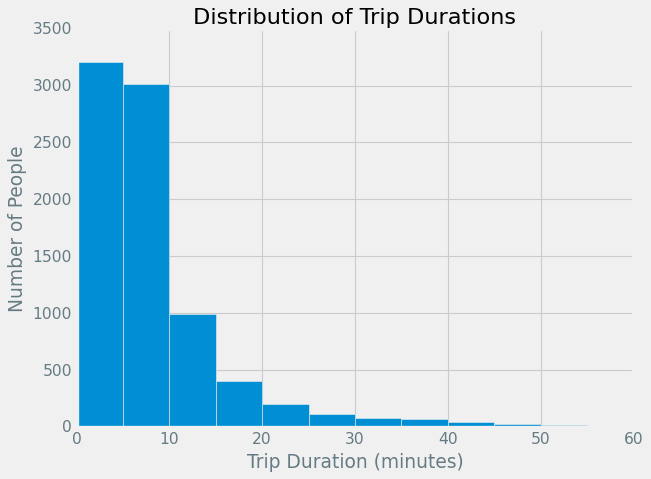

In [112]:
plt.hist(df["Trip Duration"]/60, bins=range(0, 61, 5))
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Number of People")
plt.title("Distribution of Trip Durations")
plt.show()

#### Proportion of User Types (Most trips were made by subscribers)

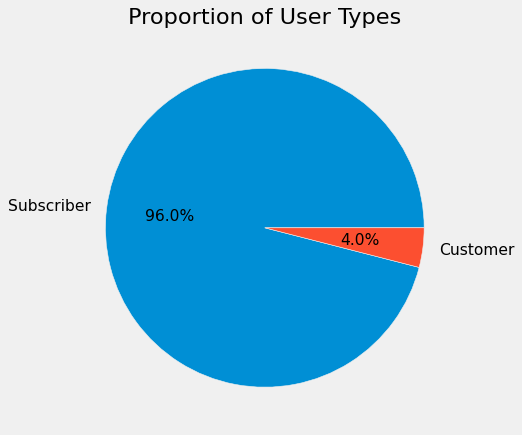

In [113]:
plt.pie(df["User Type"].value_counts(), labels=df["User Type"].unique(), autopct='%.1f%%')
plt.title("Proportion of User Types")
plt.show()

#### Distribution of End Stations (End stations centered at latitude=40.73 and longitude=-74.05)

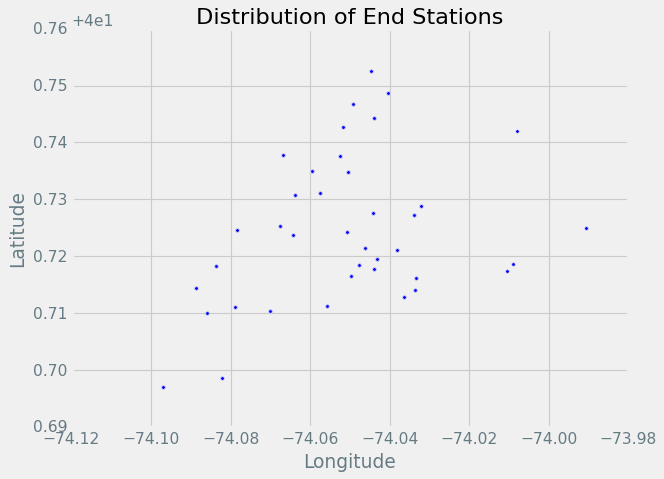

In [114]:
plt.scatter(df["End Station Longitude"], df["End Station Latitude"], s=10)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Distribution of End Stations")
plt.show()

#### Distribution of Birth Years (Most cyclists were born between 1977 and 1987)

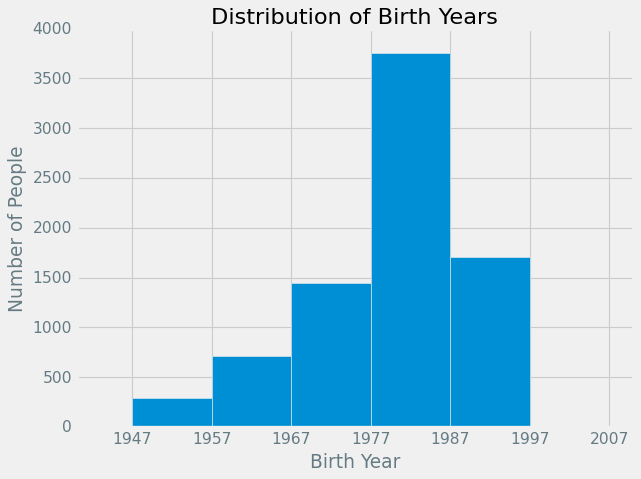

In [115]:
plt.hist(df[df['Birth Year'] != 0]["Birth Year"], bins=range(1947, 2010, 10))
plt.xticks(range(1947, 2010, 10), [str(x) for x in range(1947, 2010, 10)])
plt.xlabel("Birth Year")
plt.ylabel("Number of People")
plt.title("Distribution of Birth Years")
plt.show()

#### Proportion of Genders (Most cyclists were male)

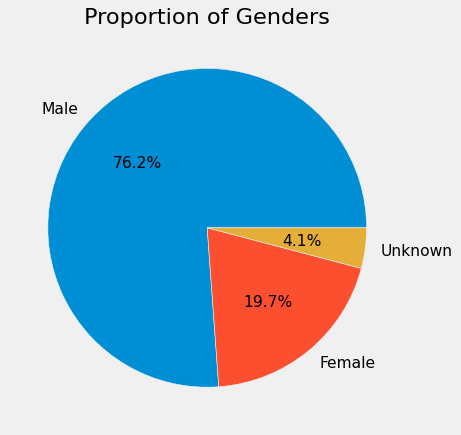

In [116]:
plt.pie(df["Gender"].value_counts(), labels=df["Gender"].unique(), autopct='%.1f%%')
plt.title("Proportion of Genders")
plt.show()